In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\uig62727\Downloads\archive\Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\uig62727\Downloads\archive\Data\test\adenocarcinoma\000108 (3).png
C:\Users\uig62727\Downloads\archive\Data\test\adenocarcinoma\000109 (2).png
C:\Users\uig62727\Downloads\archive\Data\test\adenocarcinoma\000109 (4).png
C:\Users\uig62727\Downloads\archive\Data\test\adenocarcinoma\000109 (5).png
C:\Users\uig62727\Downloads\archive\Data\test\adenocarcinoma\000112 (2).png
C:\Users\uig62727\Downloads\archive\Data\test\adenocarcinoma\000113 (7).png
C:\Users\uig62727\Downloads\archive\Data\test\adenocarcinoma\000114 (5).png
C:\Users\uig62727\Downloads\archive\Data\test\adenocarcinoma\000114.png
C:\Users\uig62727\Downloads\archive\Data\test\adenocarcinoma\000115 (4).png
C:\Users\uig62727\Downloads\archive\Data\test\adenocarcinoma\000115 (8).png
C:\Users\uig62727\Downloads\archive\Data\test\adenocarcinoma\000115.png
C:\Users\uig62727\Downloads\archive\Data\test\adenocarcinoma\000116 (5).png
C:\Users\uig62727\Downloads\archive\Data\test\adenocarcinoma\000116 (7).png
C:\Users\uig62727\Do

In [4]:
import tensorflow as tf

train_path = r'C:\Users\uig62727\Downloads\archive\Data\train'
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
train_path,
image_size = (224,224),
batch_size = 32,
label_mode = 'int'
)

test_path = r'C:\Users\uig62727\Downloads\archive\Data\test'
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
test_path,
image_size = (224,224),
batch_size = 32,
label_mode = 'int'
)

valid_path = r'C:\Users\uig62727\Downloads\archive\Data\valid'
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
valid_path,
image_size = (224,224),
batch_size = 32,
label_mode = 'int'
)

Found 613 files belonging to 4 classes.
Found 315 files belonging to 4 classes.
Found 72 files belonging to 4 classes.


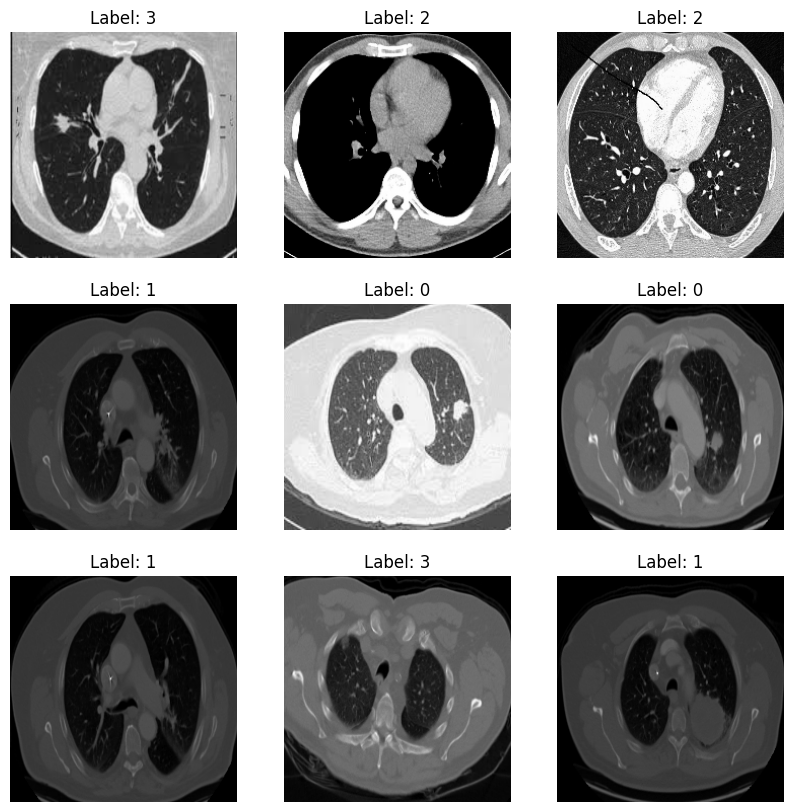

In [5]:
import matplotlib.pyplot as plt

for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10,10))
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()

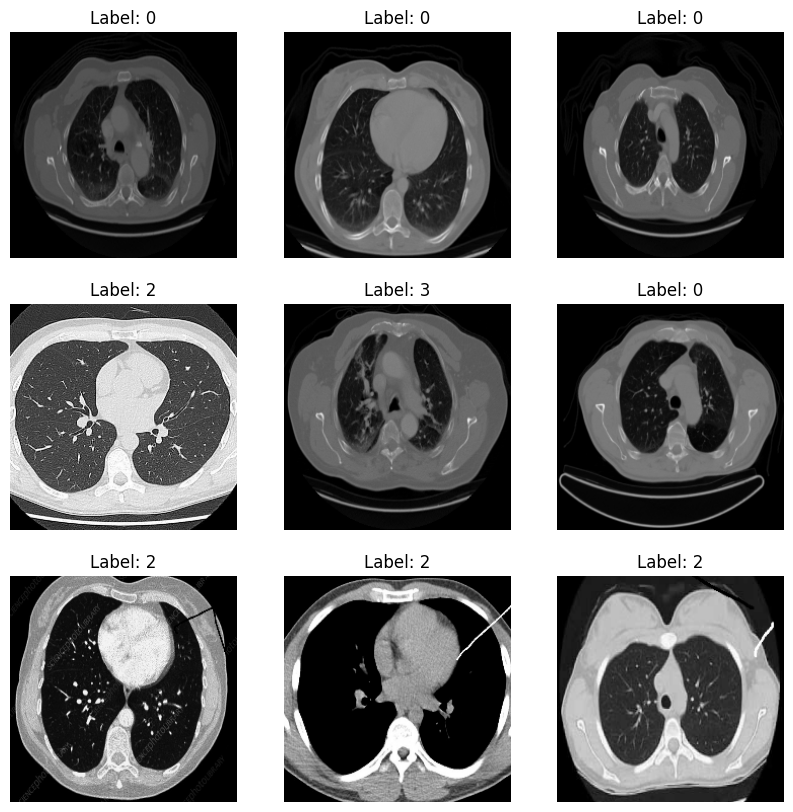

In [6]:
for images, labels in test_dataset.take(1):
    plt.figure(figsize=(10,10))
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()

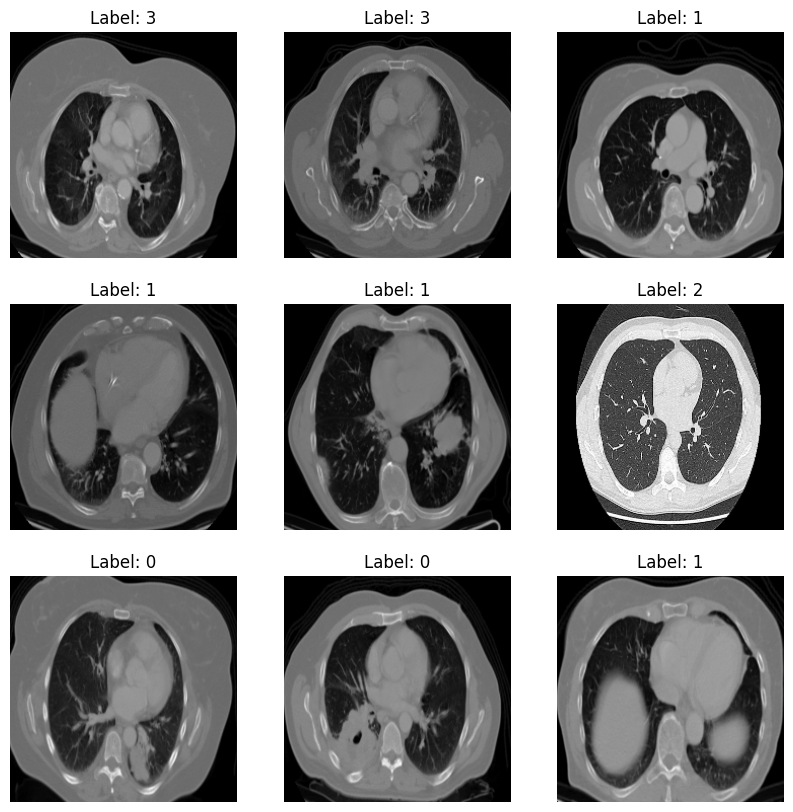

In [7]:
for images, labels in valid_dataset.take(1):
    plt.figure(figsize=(10,10))
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()

In [21]:
def normalize(image, label):
    image = tf.cast(image, tf.float32)/255

    angle = tf.random.uniform([], minval=0, maxval=360, dtype=tf.float32)
    image = tf.image.rot90(image, k=tf.cast(angle // 90, tf.int32))
    return image, label

In [22]:
train_dataset = train_dataset.map(normalize)
test_dataset = train_dataset.map(normalize)
valid_dataset = train_dataset.map(normalize)

In [34]:
from tensorflow.keras import layers, models, applications, regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

base_model = applications.EfficientNetB3(input_shape=(224,224,3),
                                       include_top = False,
                                       weights='imagenet',
                                       pooling = 'max')

base_model.trainable = False

model = models.Sequential([
    base_model,
    BatchNormalization(axis=-1),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

In [35]:
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_dataset, validation_data = valid_dataset, epochs = 10)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.2416 - loss: 2.9508 - val_accuracy: 0.3181 - val_loss: 3.8883
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.2429 - loss: 2.8323 - val_accuracy: 0.2529 - val_loss: 2.9696
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.2274 - loss: 2.7501 - val_accuracy: 0.2414 - val_loss: 6.2039
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.2580 - loss: 2.7969 - val_accuracy: 0.2529 - val_loss: 1.9145
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.2782 - loss: 2.4094 - val_accuracy: 0.3181 - val_loss: 2.6980
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.2458 - loss: 2.3404 - val_accuracy: 0.2529 - val_loss: 2.1633
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2643 - loss: 2.3690

KeyboardInterrupt: 

In [30]:
base_model.trainable = True
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(train_dataset, validation_data = valid_dataset, epochs = 10)

Epoch 1/10
11/20 ━━━━━━━━━━━━━━━━━━━━ 4:03 27s/step - accuracy: 0.2698 - loss: 34.5735

KeyboardInterrupt: 

In [22]:
test_loss, test_acc = model.evaluate(valid_dataset)

print('Test acc: ', test_acc)

20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 537ms/step - accuracy: 0.3002 - loss: 1.3721
Test acc:  0.2528548240661621
